# Features importances du modèle XGBOOST sur 2 classes

### Imports

In [1]:
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.set_option('display.max_columns', None)
## Import des scripts python
import sys
import os
sys.path.append(os.path.abspath('../../python_scripts/'))

#import load_datas
import train_model as train
import save_model as saveModel
#import pickle_model

# Rechargement en cas de modification
import importlib
#importlib.reload(train)
#importlib.reload(saveModel)
#importlib.reload(pickle_model)

### Chargement des shap values de la classe 3 (Tué)

/home/flakai/Documents/MAR24_CDS_Accidents/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


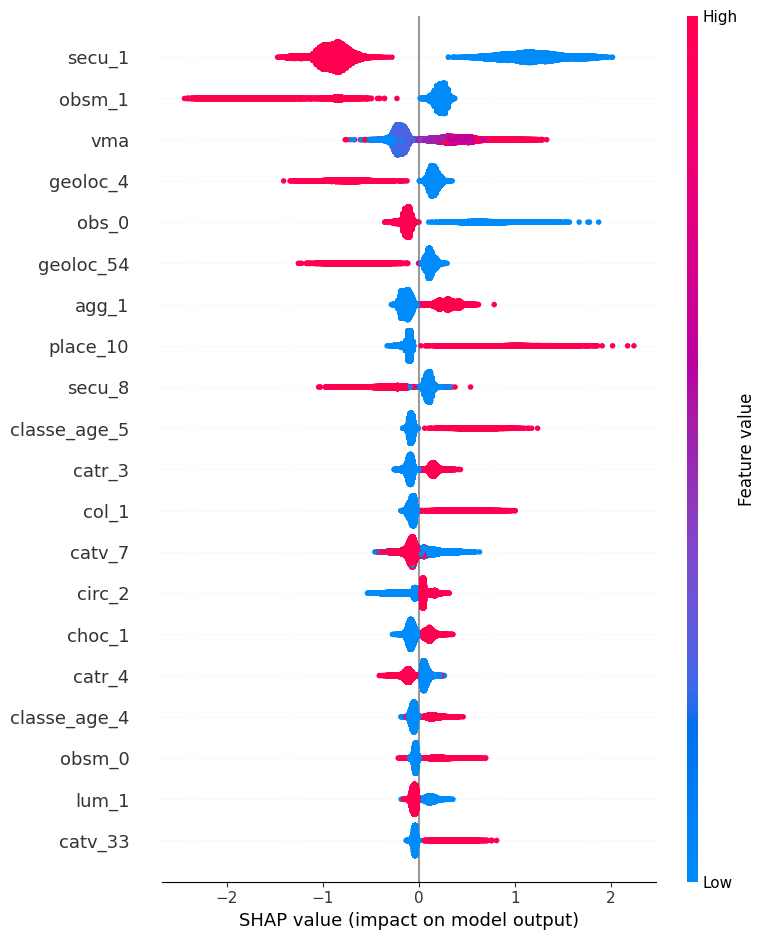

In [2]:
import shap

shap_df= pd.read_csv("shape_value_files/1_final_xgboost_values_data_geo.zip", \
                      compression=dict(method='zip', archive_name='1_final_xgboost_values_data_geo.csv'))

X_test = pd.read_csv("../../../../Data/X_test.zip", compression=dict(method='zip', archive_name='X_test.csv'))

shap_df= shap_df.drop(columns=['x_test_instance','base_values'])

shap_values_csv = shap_df.values

feature_names = shap_df.columns

shap_exp = shap.Explanation(values=shap_values_csv, data=X_test, feature_names=feature_names)

shap.summary_plot(shap_exp)


**Remarques :**

Les caractéristiques les plus importantes, par ordre d'importance, sont :
* **secu_1 (ceinture de sécurité)**
   > Selon le modèle, le risque de se faire tué/hospitalisé est plus important sans ceinture de sécurité.
* **obsm_1 (obstacle mobile heurté)** 
  > Selon le modèle, si l'obstacle heurté est un piéton, le risque d'être tué/hospitalisé est faible
* **vma (vitesse maximales autorisée)**
  > Selon le modèle, plus la vitesse maximale autorisée est élevée, plus la probabilité d'être tué/hospitalisé est importante.

* **geoloc_4 (Géolocalisation 4)** 
  > Selon le modèle, si la la géolocalisation 4 est abscente plus la probabilité d'être tué ou d'être bléssé hospitalisé est importante

* **obs_0 (Obstacle fixe sans objet)**
  > Selon le modèle, si l'obstacle fixe est sans objet alors les risque d'etre tué ou blessé hospitalise est faible

* **geoloc_54 (Géolocalisation 54)** 
  > Selon le modèle, si la la géolocalisation 54 est abscente plus la probabilité d'être tué ou d'être bléssé hospitalisé est importante


* **agg_1 (Hors agglomération)** 
  > Selon le modèle, le risque d'être tué sur en hors agglomération est important.


### Groupement des variables catégorielles

In [3]:
# Creer un dataframe avec les valeurs absolue des shap values
df_shap=pd.DataFrame(np.abs(shap_values_csv), columns=X_test.columns)

column_groups = {}

# Regroupement des colonnes
for col in X_test.columns:
    prefix = col.split('_')[0]  
    if prefix not in column_groups:
        column_groups[prefix] = []
    column_groups[prefix].append(col)

df_avg = pd.DataFrame()

# Calculer les moyennes pour chaque groupe de variable
for prefix, columns in column_groups.items():
    df_avg[f'{prefix}'] = df_shap[columns].mean(axis=1) 

# Afficher le DataFrame des moyennes des observations
display(df_avg.head(3))


,mois,lum,agg,int,atm,col,catr,circ,vosp,prof,plan,surf,infra,situ,catv,obs,obsm,choc,manv,motor,place,catu,trajet,hh,classe,geoloc,nbv,vma,sexe,secu,weekend
0,0.006270,0.014663,0.030708,0.010157,0.001266,0.015068,0.046722,0.050503,0.021802,0.001512,0.005231,0.000419,0.002106,0.002238,0.013955,0.007378,0.040966,0.017643,0.002963,0.002750,0.013470,0.009400,0.022286,0.003220,0.037060,0.009116,0.017504,0.425951,0.006752,0.158162,0.009200
1,0.002192,0.009465,0.172871,0.006792,0.001381,0.092927,0.035926,0.072516,0.001728,0.004874,0.003080,0.000379,0.000582,0.004703,0.006810,0.004759,0.040676,0.028519,0.027778,0.000432,0.011364,0.010497,0.034206,0.004358,0.024494,0.004255,0.028462,0.501313,0.025887,0.088351,0.052091
2,0.004932,0.046201,0.073838,0.004802,0.001535,0.031625,0.039394,0.033592,0.010968,0.005712,0.008536,0.000071,0.000783,0.004688,0.004495,0.009350,0.055441,0.023459,0.006055,0.002117,0.010842,0.011099,0.024805,0.003360,0.030447,0.010267,0.079393,0.297700,0.028367,0.124240,0.013391


### Global Feauture Importance

,vma,secu,agg,obsm,nbv,col,classe,circ,sexe,catr,catu,place,choc,lum,obs,trajet,weekend,catv,situ,manv,geoloc,int,hh,plan,infra,mois,prof,vosp,atm,motor,surf
0,0.279134,0.134748,0.098841,0.07109,0.045996,0.04324,0.043001,0.040537,0.03246,0.030499,0.025197,0.02326,0.022939,0.019498,0.014829,0.014426,0.01379,0.009701,0.008935,0.008577,0.008431,0.007166,0.006047,0.004455,0.003914,0.003878,0.003536,0.003466,0.002836,0.002696,0.001687


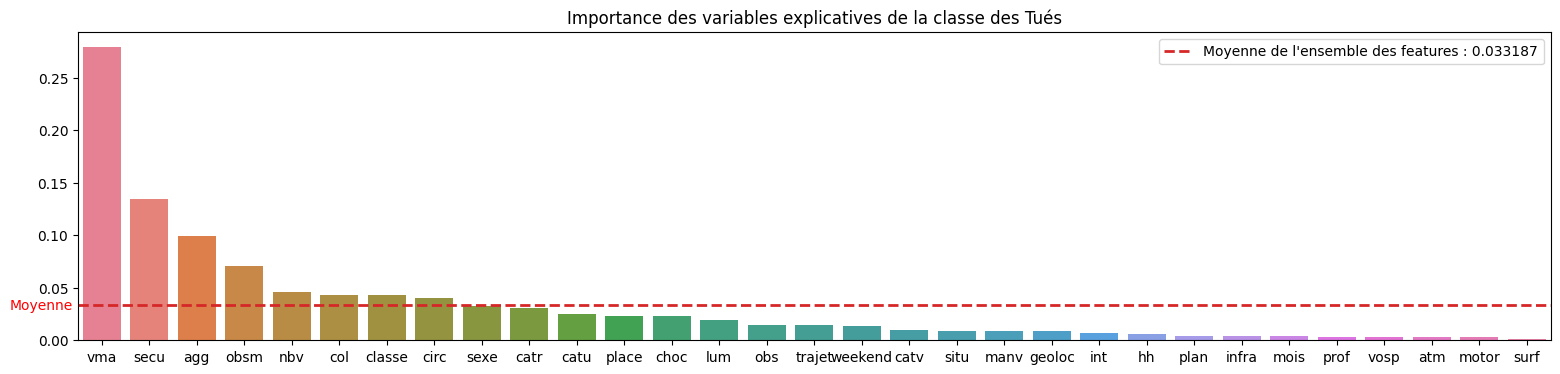

In [4]:

### Moyenne des shap values par variable
df_final_var_mean=pd.DataFrame(df_avg.mean().sort_values(ascending=False)).T

display(df_final_var_mean)

plt.figure(figsize=(19, 4))

# Bar plot de l'importance des variables explicatives
sns.barplot(df_final_var_mean)

# La moyenne total des features
cat_moy=df_avg.mean().mean()
plt.axhline(y=cat_moy, color=plt.cm.tab10(3), linestyle='--', linewidth=2, label=f"Moyenne de l'ensemble des features : {cat_moy:.6f}")
plt.text(-0.6, cat_moy, "Moyenne", color='r', va='center', ha='right')


plt.legend()
plt.title("Importance des variables explicatives de la classe des Tués")
plt.show()

**Remarques:**
>* Les caractéristiques les plus importantes du modèle, par ordre d'importance, sont les suivantes : **vma,secu,agg,obsm,nbv,col,classe_age,circ**
>* La vitesse est la caractéristique la plus importante, qui domine largement
>* Enfin, les variables explicatives les plus importantes correspondent quasiment aux campagnes de sensibilisation routière, à savoir la vitesse, les équipements de sécurité, l'âge, etc.

### Fonction d'importance d'une variable

In [5]:


def feature_summary_plot(var_name:str):

    
    mois_columns_with_index = [(index, col) for index, col in enumerate(shap_df.columns) if col.startswith(var_name)]
    
    index_min=min(mois_columns_with_index)[0]
    index_max=max(mois_columns_with_index)[0]
    
    shap.summary_plot(shap_values_csv[:,index_min:index_max+1], X_test.iloc[:, index_min:index_max+1])

#feature_summary_plot("col")

### Fonction Summary Plot des variables d'une variable catégorielle

In [6]:

df_shap_var_cat = pd.DataFrame(df_shap.mean().sort_values(ascending=False)).T

def show_categoriel_bar_plot(col_name:str,plot_size=(5,5)):
    #print(f"***** Annalyse des shap values de la variables {col_name} *****")
    for prefix, columns in column_groups.items():
        if prefix==col_name: 
            var_plot = list()
            for c in df_shap_var_cat.columns:                
                if c.startswith(prefix):
                    var_plot.append(c)
                    #df_plot[c]=tsi2[c]

            #Plot
            plt.figure(figsize=plot_size)
            ax=sns.barplot(df_shap_var_cat[var_plot])

            #Ligne de la moyenne
            cat_moy=df_shap_var_cat[var_plot].mean().mean()
            #plt.axhline(y=cat_moy, color=plt.cm.tab10(3), linestyle='--', linewidth=2, label='Moyenne')
            plt.axhline(y=cat_moy, color=plt.cm.tab10(3), linestyle='--', linewidth=2, label=f"Moyenne : {cat_moy:.6f}")
            plt.text(-0.6, cat_moy, "Moyenne", color='r', va='center', ha='right')

            #Titre
            plt.title(f"Bar plot shap value de la variable {col_name}")

            plt.legend()
            plt.show()


## Annalyse des 8 features les plus imporatantes : vma,secu,agg,obsm,nbv,col,classe_age,circ

### Importance la feature **vma** (Vistesse maximale autorisée)

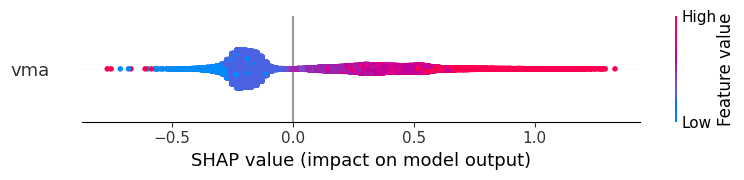

In [7]:
feature_summary_plot("vma")

**Remarques:**
>* vma est la caractéristique la plus importante de notre modèle.
>* Plus la vitesse maximale autorisée est grande, plus le risque d'être tué/hospitalisé est élevé


### Importance de la feature **secu** (Présence et utlisation d'un équipement de sécurité)

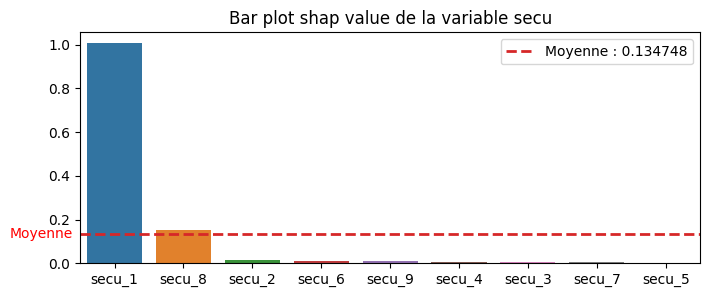

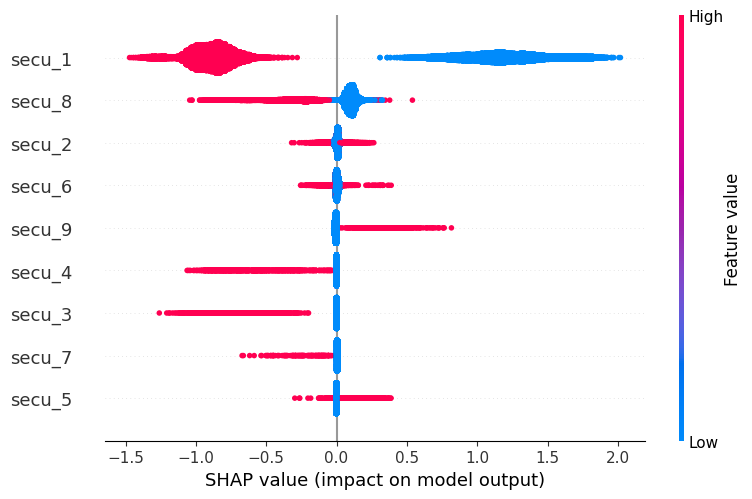

In [8]:
show_categoriel_bar_plot('secu',plot_size=(8,3))
feature_summary_plot("secu")


**Remarques:**
>* La présence du port de la ceinture de sécurité (secu_1) est la variable la plus dominante de la feature
>* Selon le modèle, l'absence du port de la ceinture augmente le risque d'être tué/hospitalisé


### Importance de la feature **agg** (Agglomération)

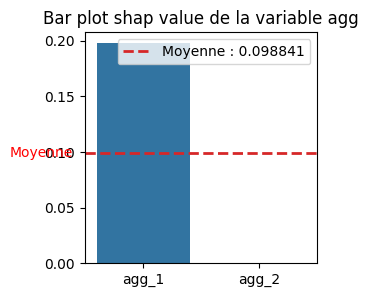

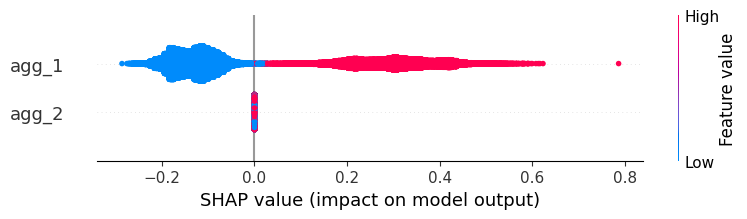

In [9]:
show_categoriel_bar_plot('agg',plot_size=(3,3))
feature_summary_plot("agg")


**Remarques:**
>* agg_1 = Hors agglomération et agg_2 = En agglomération
>* Selon le modèle, plus on est hors agglomération, plus le risque d'être tué/hospitalisé est élevé

### Importance de la feature **obsm** (Obstacle mobile heurté)

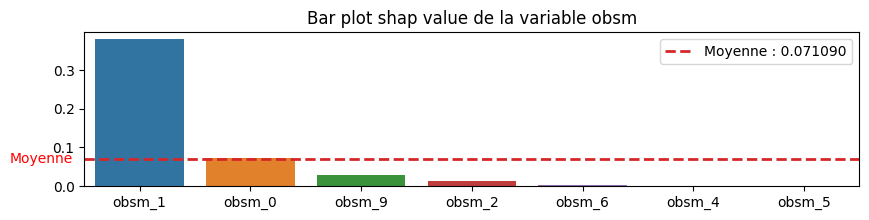

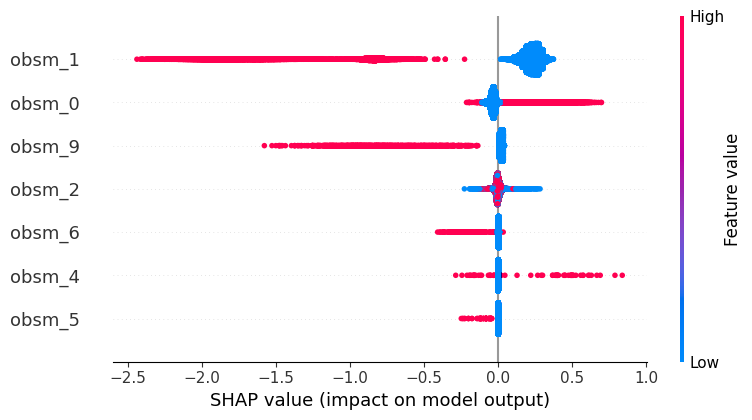

In [10]:
show_categoriel_bar_plot('obsm',plot_size=(10,2))
feature_summary_plot("obsm")

**Remarques:**
>* La catégorie obsm_1 (piéton) domine complètement les autres
>* Selon le modèle, si l'obstacle mobile est un piéton, le risque de se faire tuer/hospitaliser est plus faible

### Importance de la feature **nbv** (Nombre de voie)

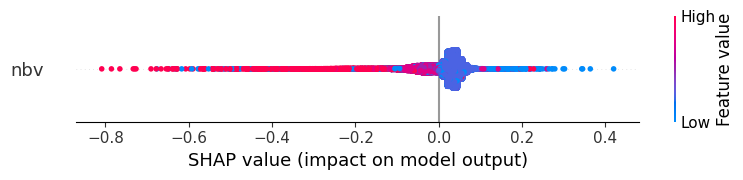

In [11]:
feature_summary_plot("nbv")

***Remarques:***
>* Le modèle prédit que plus le nombre de voies diminue, plus le risque de se faire tuer/hospitaliser augmente.

### Importance de la feature **col** (Type de colision)

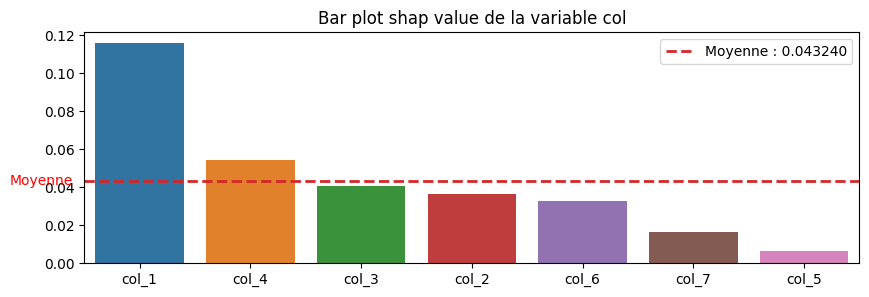

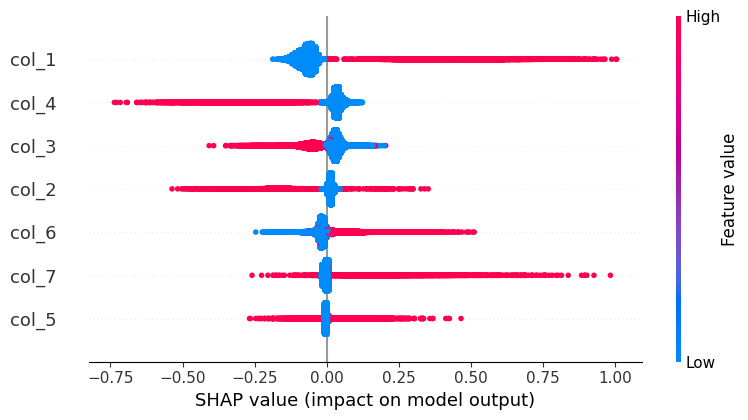

In [12]:
show_categoriel_bar_plot('col',plot_size=(10,3))
feature_summary_plot("col")

**Remarques:**
>* Les catégories col_1 ( deux véhicules frontales ) et col_4( Trois véhicules et plus en chaîne) sont dominants
>* Le modèle prédit que la colision de type frontale (col_1) ne fait que des tués/hospitalisés 
>* Le modèle prédit que  le risque de survit est plus élévée si la colision est de type deux véhicules par le coté (col_3) ou col_4

### Importance de la feature **classe_age** (Classge d'age)

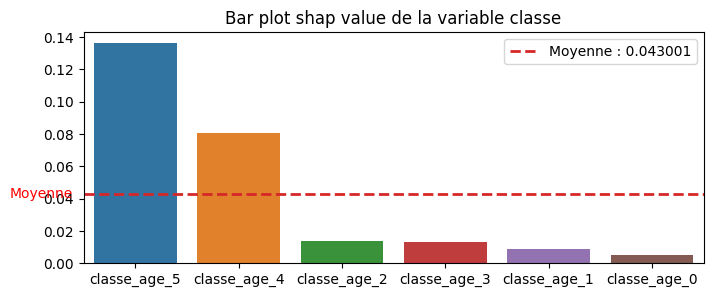

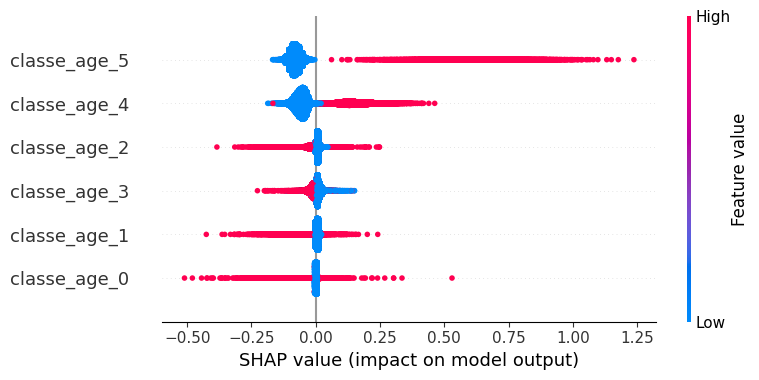

In [13]:
show_categoriel_bar_plot('classe',plot_size=(8,3))
feature_summary_plot("classe")

**Remarques:**
>* Les catégories 5 (+65 ans) et 4 (45-64 ans) sont dominantes dans la feature
>* Selon le modèle, les 45-65 ans et les +65 ans sont plus à risque de se faire tuer/hospitaliser


### Importance de la feature **circ** (Régime de circulation)

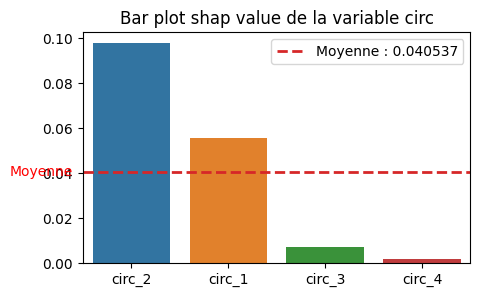

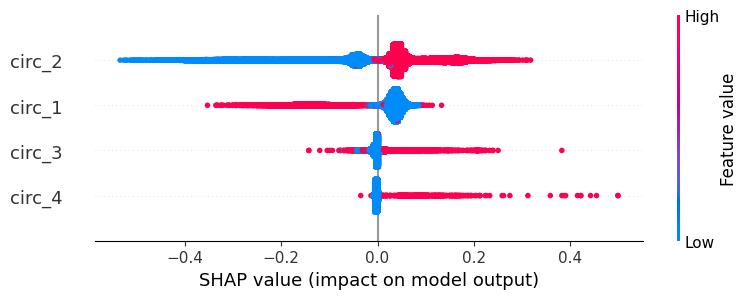

In [14]:
show_categoriel_bar_plot('circ',plot_size=(5,3))
feature_summary_plot("circ")

**Remarques:**
>* Les catégories circ_2 (sens bidirectionnel) et circ_1 (sens unique) sont dominantes dans la caractéristique.
>* Selon le modèle, le sens de circulation bidirectionnel (circ_2) prédit plus de décès/hospitalisation, contrairement au sens unique (circ_1).
